In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [88]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (OneHotEncoder,
                                   OrdinalEncoder,
                                   StandardScaler
                                  )


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

plt.style.use('seaborn')

### LOADING THE DATA

In [3]:
# loading the data
DATAFILEPATH = 'data/california/'

def load_housing_data():
    csv_path = os.path.join(DATAFILEPATH, 'housing.csv')
    return pd.read_csv(csv_path, parse_dates=True)

In [4]:
# Viewing the data (first five rows)
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# viewing the last first rows of the dataset
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
# Number of instances of the ocean proximity feature
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

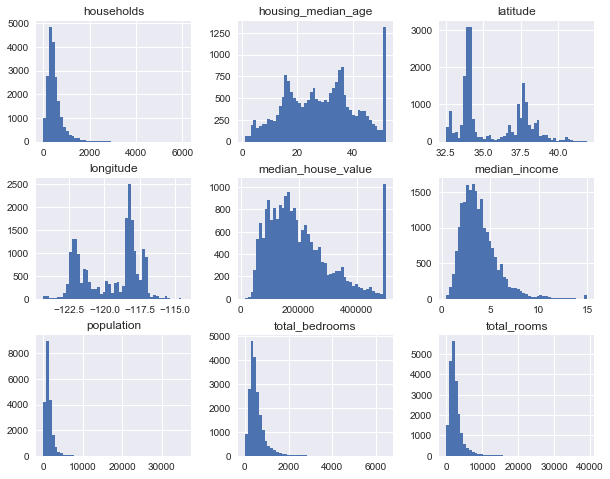

In [9]:
# Distriution of the data
housing.hist(bins=50, figsize=(10, 8))
plt.show()

### Create a Test Set

In [10]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set1, test_set1 = split_train_test(housing, 0.2)
train_set1.shape, test_set1.shape

((16512, 10), (4128, 10))

In [11]:
# using train_test_split(method)
train_set2, test_set2 = train_test_split(housing, test_size=0.2, random_state=42)
train_set2.shape, test_set2.shape

((16512, 10), (4128, 10))

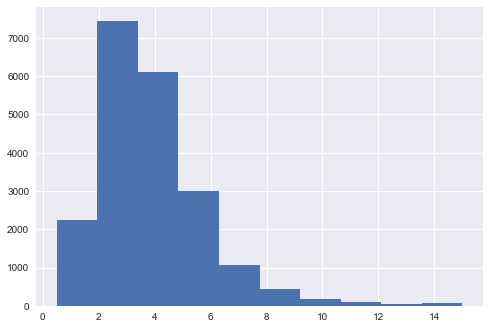

In [12]:
housing['median_income'].hist(bins=10)
plt.show()

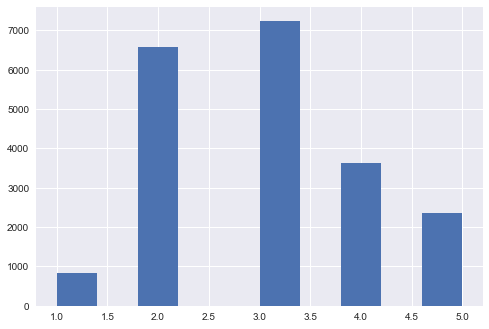

In [13]:
housing['income cat'] = pd.cut(housing['median_income'],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])
housing['income cat'].hist()
plt.show()

In [14]:
# spliting the dataset using stratified sampling method
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set['income cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income cat, dtype: float64

In [16]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop('income cat', axis=1, inplace=True)

In [17]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


###  Visualizing the Data to Gain Insights

In [18]:
# Keeping the test set and working with the train set
# create a copy of the training set for Exploratory data analysis
housing = strat_train_set.copy()

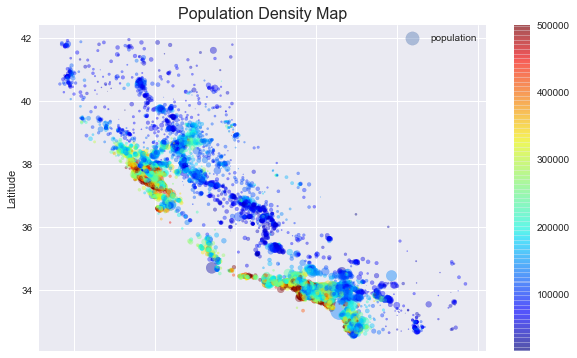

In [19]:
housing.plot(x='longitude', y='latitude', kind='scatter', alpha=0.4, 
            s=housing['population']/100, label='population', 
            c=housing['median_house_value'], cmap='jet', colorbar=True,
            figsize=(10, 6))
plt.title('Population Density Map', fontsize=16)
plt.xlabel('Longituted')
plt.ylabel('Latitude')
plt.legend()
plt.show()

###  Correlation

In [20]:
# Lookin for correlation in the dataset
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [21]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


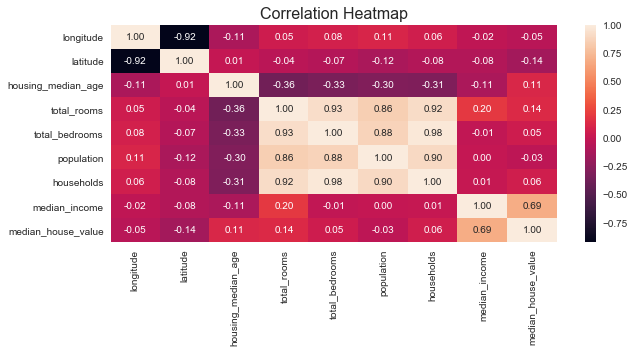

In [22]:
# ploting the heatmap of the dataset correlation 

def plot_correlation(corr_matrix):
    ''' Plots the correlation metrices heatmap '''
    fig, ax = plt.subplots(figsize=(10, 4))
    ax = sns.heatmap(corr_matrix, annot=True, fmt='.2f')
    plt.title('Correlation Heatmap', fontsize=16)
    plt.xticks()
    plt.show()
plot_correlation(corr_matrix)

### Scatter matrix

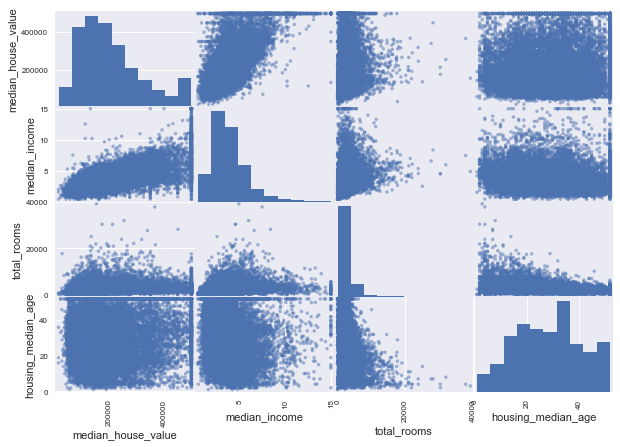

In [23]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(10, 7))
plt.show()

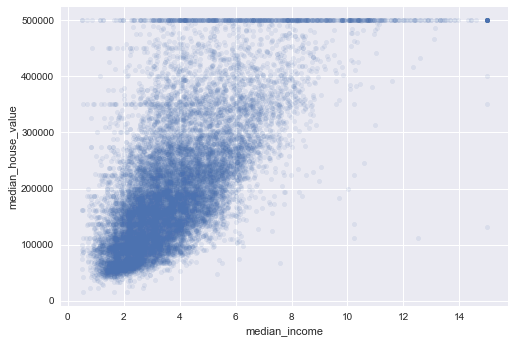

In [24]:
# plotting the median house value against the median income
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()

###  Attribute Combinations

In [25]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] =housing['population']/housing['households']

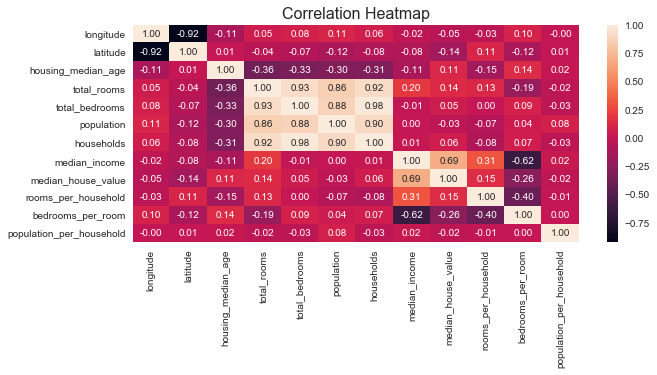

In [26]:
corr_matrix = housing.corr()
plot_correlation(corr_matrix)

In [27]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

##  Prepare the Data for Machine Learning Algorithms

###  Data cleaning

In [91]:
# Making the features and labels from a copy of the training set
housing = strat_train_set.drop('median_house_value', axis=1)
housing_label = strat_train_set['median_house_value'].copy() # label

In [29]:
housing.shape, housing_label.shape

((16512, 9), (16512,))

In [30]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [32]:
# dealing with missing values

# def fillMissingWithMedian(dataframe, categorical_values):
#     ''' This function fills in the missing values of all the numerical features with their
#     median value.
#     'dataframe' : The dataframe in which the operration is to be carried out on
#     'categorical_values' : List of non-numerical values.
#     '''
#     names = []
#     for column in dataframe.columns:
#         if not dataframe[column].dtype == 'object': 
#             names.append(column)
#     attributes = []
#     for values in categorical_values:
#         attributes.append(values)
#         housing_dropped = dataframe.drop(attributes, axis=1)
        
#     imputer = SimpleImputer(strategy='median') # fill with the median value
#     filled_housing = imputer.fit_transform(housing_dropped)
#     # change to a pandas dataframe
#     housing_transformed = pd.DataFrame(filled_housing, columns=names, 
#                                        index=dataframe.index)
#     return housing_transformed

# housing_transformed = fillMissingWithMedian(housing,
#                                             categorical_values=['ocean_proximity'])
# housing_transformed.head(10)

In [33]:
# housing_transformed.isna().sum() # checking for missing value

In [34]:
# Filling missing numerical values using the SimpleImputer class
# create instance of the class
imputer = SimpleImputer()
# remove non-numerical features from the feature variable
housing_num = housing.drop('ocean_proximity', axis=1)
# fit the feature to the SimpleImputer instance
imputer.fit(housing_num)
# transform the features with the trained input
X = imputer.transform(housing_num)
# change back to pd.dataframe type
housing_trans = pd.DataFrame(X, columns=housing_num.columns, 
                            index=housing_num.index)
housing_trans

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [35]:
housing_trans.median().values, imputer.statistics_

(array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  436.    , 1164.    ,
         408.    ,    3.5409]),
 array([-119.57583394,   35.63957728,   28.65310078, 2622.7283188 ,
         534.97389018, 1419.7908188 ,  497.06038033,    3.87558937]))

### Handling text and categorical attributes

In [36]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [37]:
housing_cat.value_counts() # using the value_counts() method to find the 
                           # number of categories in the attribute

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [38]:
housing_cat.isnull().sum()

0

In [39]:
# using the OrdinalEncoder class
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat.values.reshape(-1,1))
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [40]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [41]:
# A better way of encoding a categorical feature is to use the OneHotEncoder() class
one_hot = OneHotEncoder()
housing_cat_1hot = one_hot.fit_transform(housing_cat.values.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [42]:
one_hot.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
housing_cat_1hot[:10].toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

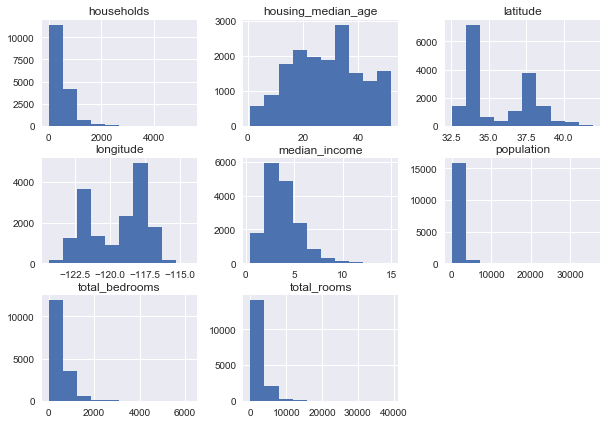

In [59]:
housing.hist(figsize=(10, 7))
plt.show()

### Transformation Pipeline

In [99]:
# Pipeline for numerical features
''' steps to take : * fill missing numerical values with the median values (all attributes)
                    * scale the features using the standard scaler class
                    * fit_transform the numerical features and assign to a variable
'''
num_pipeline = Pipeline([
    ('num_fill', SimpleImputer(strategy='median')),
    ('num_std_scaler', StandardScaler()),
])

In [105]:
# ColumnTransfomer
''' Steps : * create lists of numerical and categorical attributes of the dataset
            * create a ColumnTransformer class
            * make a name/estimator list of transformations to be carried out
            * fit_tramsform the ColumnTransformer instance
            * assign to a variable        
'''

num_attr = list(housing_num)
cat_attr = ['ocean_proximity']

full_pipeline= ColumnTransformer([
    ('num_attr', num_pipeline, num_attr), # numerical features
    ('cat', OneHotEncoder(), cat_attr), # cat features
])
housing_prepared = full_pipeline.fit_transform(housing)

## Selecting and Training a Model

### Training and Evaluating on the Training Set